In [3]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [ ]:
offspring_factor=3
height=4
#G=nx.generators.classic.balanced_tree(offspring_factor,height)
#root=utils.list_degree_nodes(G,offspring_factor,1)[0]
G=utils.random_dag(10,50)
root=np.random.choice(utils.sources(G))
#G,_=utils.directify(G,root)
pos=graphviz_layout(G,prog='dot')
nx.draw(G,pos)
plt.show()

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


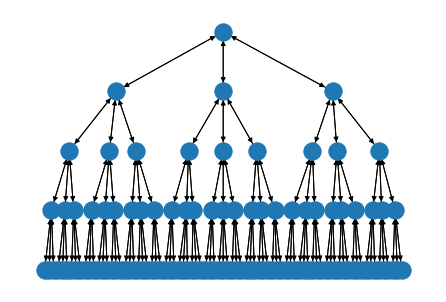

In [36]:
G=rw.patternWalker(G,root,50,0.05)
G.set_weights()
print('Number of duplicate strings:', G.num_pattern_duplicates())
mfpts=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')

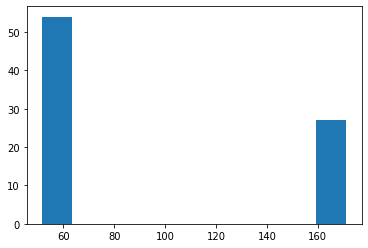

In [29]:
_=plt.hist(mfpts.values())

In [30]:
temp=[]
for _ in range(100):
    G.reset_patterns()
    G.set_weights()
    mfpts=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)],'prob')
    for x in mfpts.values():
        temp.append(x)

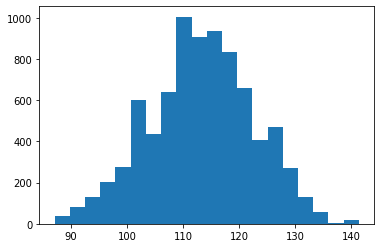

In [31]:
_=plt.hist(temp,bins=20)

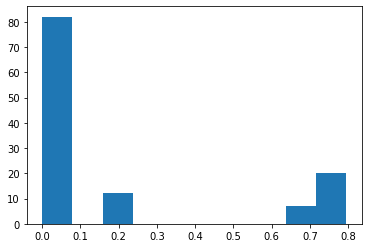

In [32]:
#print(nx.to_dict_of_dicts(G))
#print(G.edges(data=True))
down=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),'prob',G.nodes())
_=plt.hist(down)